# prediction of housing prices

In [14]:
import os
import pandas as pd
import numpy as np

In [3]:
pwd = os.getcwd()
filepath = os.path.join(pwd , "housing.csv")
filepath

'/mnt/storage/home/tawheed/Documents/Programming/Machine Learning/Real Estate project/housing.csv'

In [4]:
housing_data = pd.read_csv(filepath)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_data.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot: ylabel='ocean_proximity'>

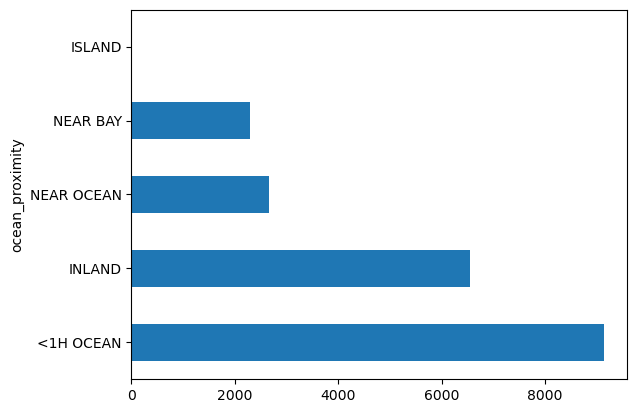

In [12]:
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

<AxesSubplot: >

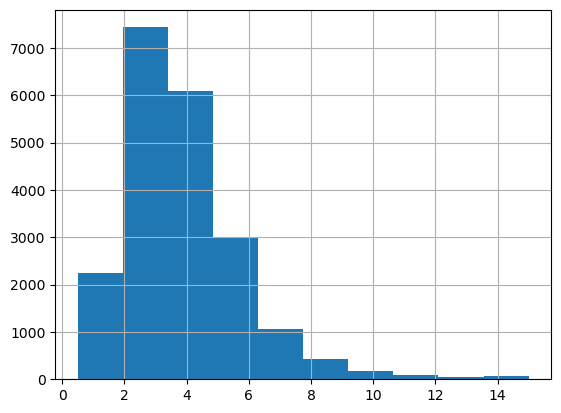

In [13]:
housing_data["median_income"].hist()

In [15]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1,2,3,4,5])
housing_data["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<AxesSubplot: >

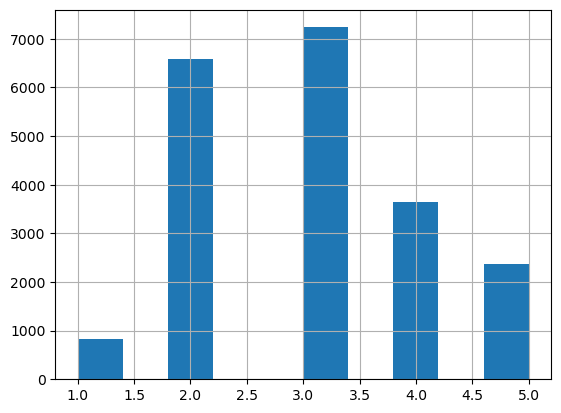

In [16]:
housing_data["income_cat"].hist()

In [17]:
y = housing_data["median_house_value"]
X = housing_data.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


# Split datasets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) 
#out of 100 examples 33 will be testing examples and 67 will be training examples which we will use to train our model
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1603,-122.14,37.88,34.0,6986.0,1096.0,2865.0,1124.0,6.2275,NEAR BAY,5
9401,-122.56,37.92,37.0,1926.0,290.0,721.0,298.0,8.9248,NEAR BAY,5
11263,-117.99,33.79,35.0,2301.0,467.0,2272.0,454.0,3.9566,<1H OCEAN,3
8465,-118.34,33.91,8.0,3937.0,1404.0,2691.0,1142.0,2.4741,<1H OCEAN,2
1568,-121.97,37.77,13.0,7241.0,1007.0,3221.0,947.0,7.2216,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
4242,-118.33,34.11,38.0,3495.0,1100.0,1939.0,994.0,2.2148,<1H OCEAN,2
8351,-118.32,33.95,43.0,3819.0,708.0,1505.0,712.0,3.1719,<1H OCEAN,3
12882,-121.34,38.67,34.0,1503.0,264.0,731.0,285.0,4.0352,INLAND,3
4588,-118.27,34.05,52.0,1292.0,864.0,2081.0,724.0,0.9563,<1H OCEAN,1
